#Predicting Overall Rating based on Players Different Stats and Comparing them with their Actual Overall rating


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


##Data PreProcessing

In [2]:
df = pd.read_csv('/content/GK(1).csv')
df

,Unnamed: 0,ID,Position,Player Name,Team Name,Nationality,Height,Weight,Age,Offensive Awareness,...,Tackling,Aggression,Defensive Engagement,GK Awareness,GK Catching,GK Parrying,GK Reflexes,GK Reach,Overall Rating,Price
0,0,9385,GK,S. Viera,Free Agents,Uruguay,184,86,39,43,...,43,52,58,78,74,80,75,75,85,0.0
1,1,15217,GK,S. Gonda,Shimizu S-Pulse,Japan,187,84,33,43,...,51,54,62,79,77,76,76,78,84,4.9
2,2,32765,GK,M. Andújar,Club Estudiantes LP,Argentina,194,88,39,42,...,46,45,58,81,70,76,76,79,84,15.0
3,3,39602,GK,E. Berisha,Torino G,Albania,194,92,33,44,...,46,44,58,76,74,78,75,78,84,7.5
4,4,40990,GK,Anthony Lopes,Olympique Lyonnais,Portugal,184,81,32,41,...,42,57,58,86,80,82,83,79,90,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,149,105589086764871,GK,S. Brodersen,Yokohama FC,Germany,188,89,25,45,...,48,55,63,82,79,78,77,81,89,0.0
150,150,105589355154576,GK,David Raya,Brentford RW,Spain,183,80,27,42,...,44,52,60,87,80,84,90,86,93,0.0
151,151,105589892037564,GK,D. Livaković,Free Agents,Croatia,187,79,27,41,...,51,50,63,85,79,78,86,87,92,0.0
152,152,105592576335661,GK,Y. Bounou,Sevilla Nervión BR,Morocco,192,78,31,42,...,42,45,59,84,73,75,80,76,83,0.0


As we can see few columns are just **Arbitrary Values** which does not have any effect on Player stats.


1.   Unnamed: 0
2.   Player Name
3.   Team Name
4.   Nationality
5.   ID
6.   Position
7.   Price

So Dropping thes columns will not affect data set.





In [3]:

df = df.drop(['Unnamed: 0','Player Name', 'Team Name','Nationality','ID','Position','Price'], axis = 1)


In [4]:
df

,Height,Weight,Age,Offensive Awareness,Ball Control,Dribbling,Tight Possession,Low Pass,Lofted Pass,Finishing,...,Defensive Awareness,Tackling,Aggression,Defensive Engagement,GK Awareness,GK Catching,GK Parrying,GK Reflexes,GK Reach,Overall Rating
0,184,86,39,43,61,60,60,64,65,55,...,60,43,52,58,78,74,80,75,75,85
1,187,84,33,43,54,51,47,59,60,43,...,53,51,54,62,79,77,76,76,78,84
2,194,88,39,42,48,42,43,49,53,43,...,53,46,45,58,81,70,76,76,79,84
3,194,92,33,44,52,48,46,54,58,43,...,50,46,44,58,76,74,78,75,78,84
4,184,81,32,41,53,48,46,57,58,42,...,47,42,57,58,86,80,82,83,79,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,188,89,25,45,53,47,48,57,60,44,...,49,48,55,63,82,79,78,77,81,89
150,183,80,27,42,57,45,47,58,64,42,...,48,44,52,60,87,80,84,90,86,93
151,187,79,27,41,56,44,49,56,57,41,...,50,51,50,63,85,79,78,86,87,92
152,192,78,31,42,60,44,43,60,60,43,...,41,42,45,59,84,73,75,80,76,83


# EXPLORATORY DATA ANALYSIS

<Axes: >

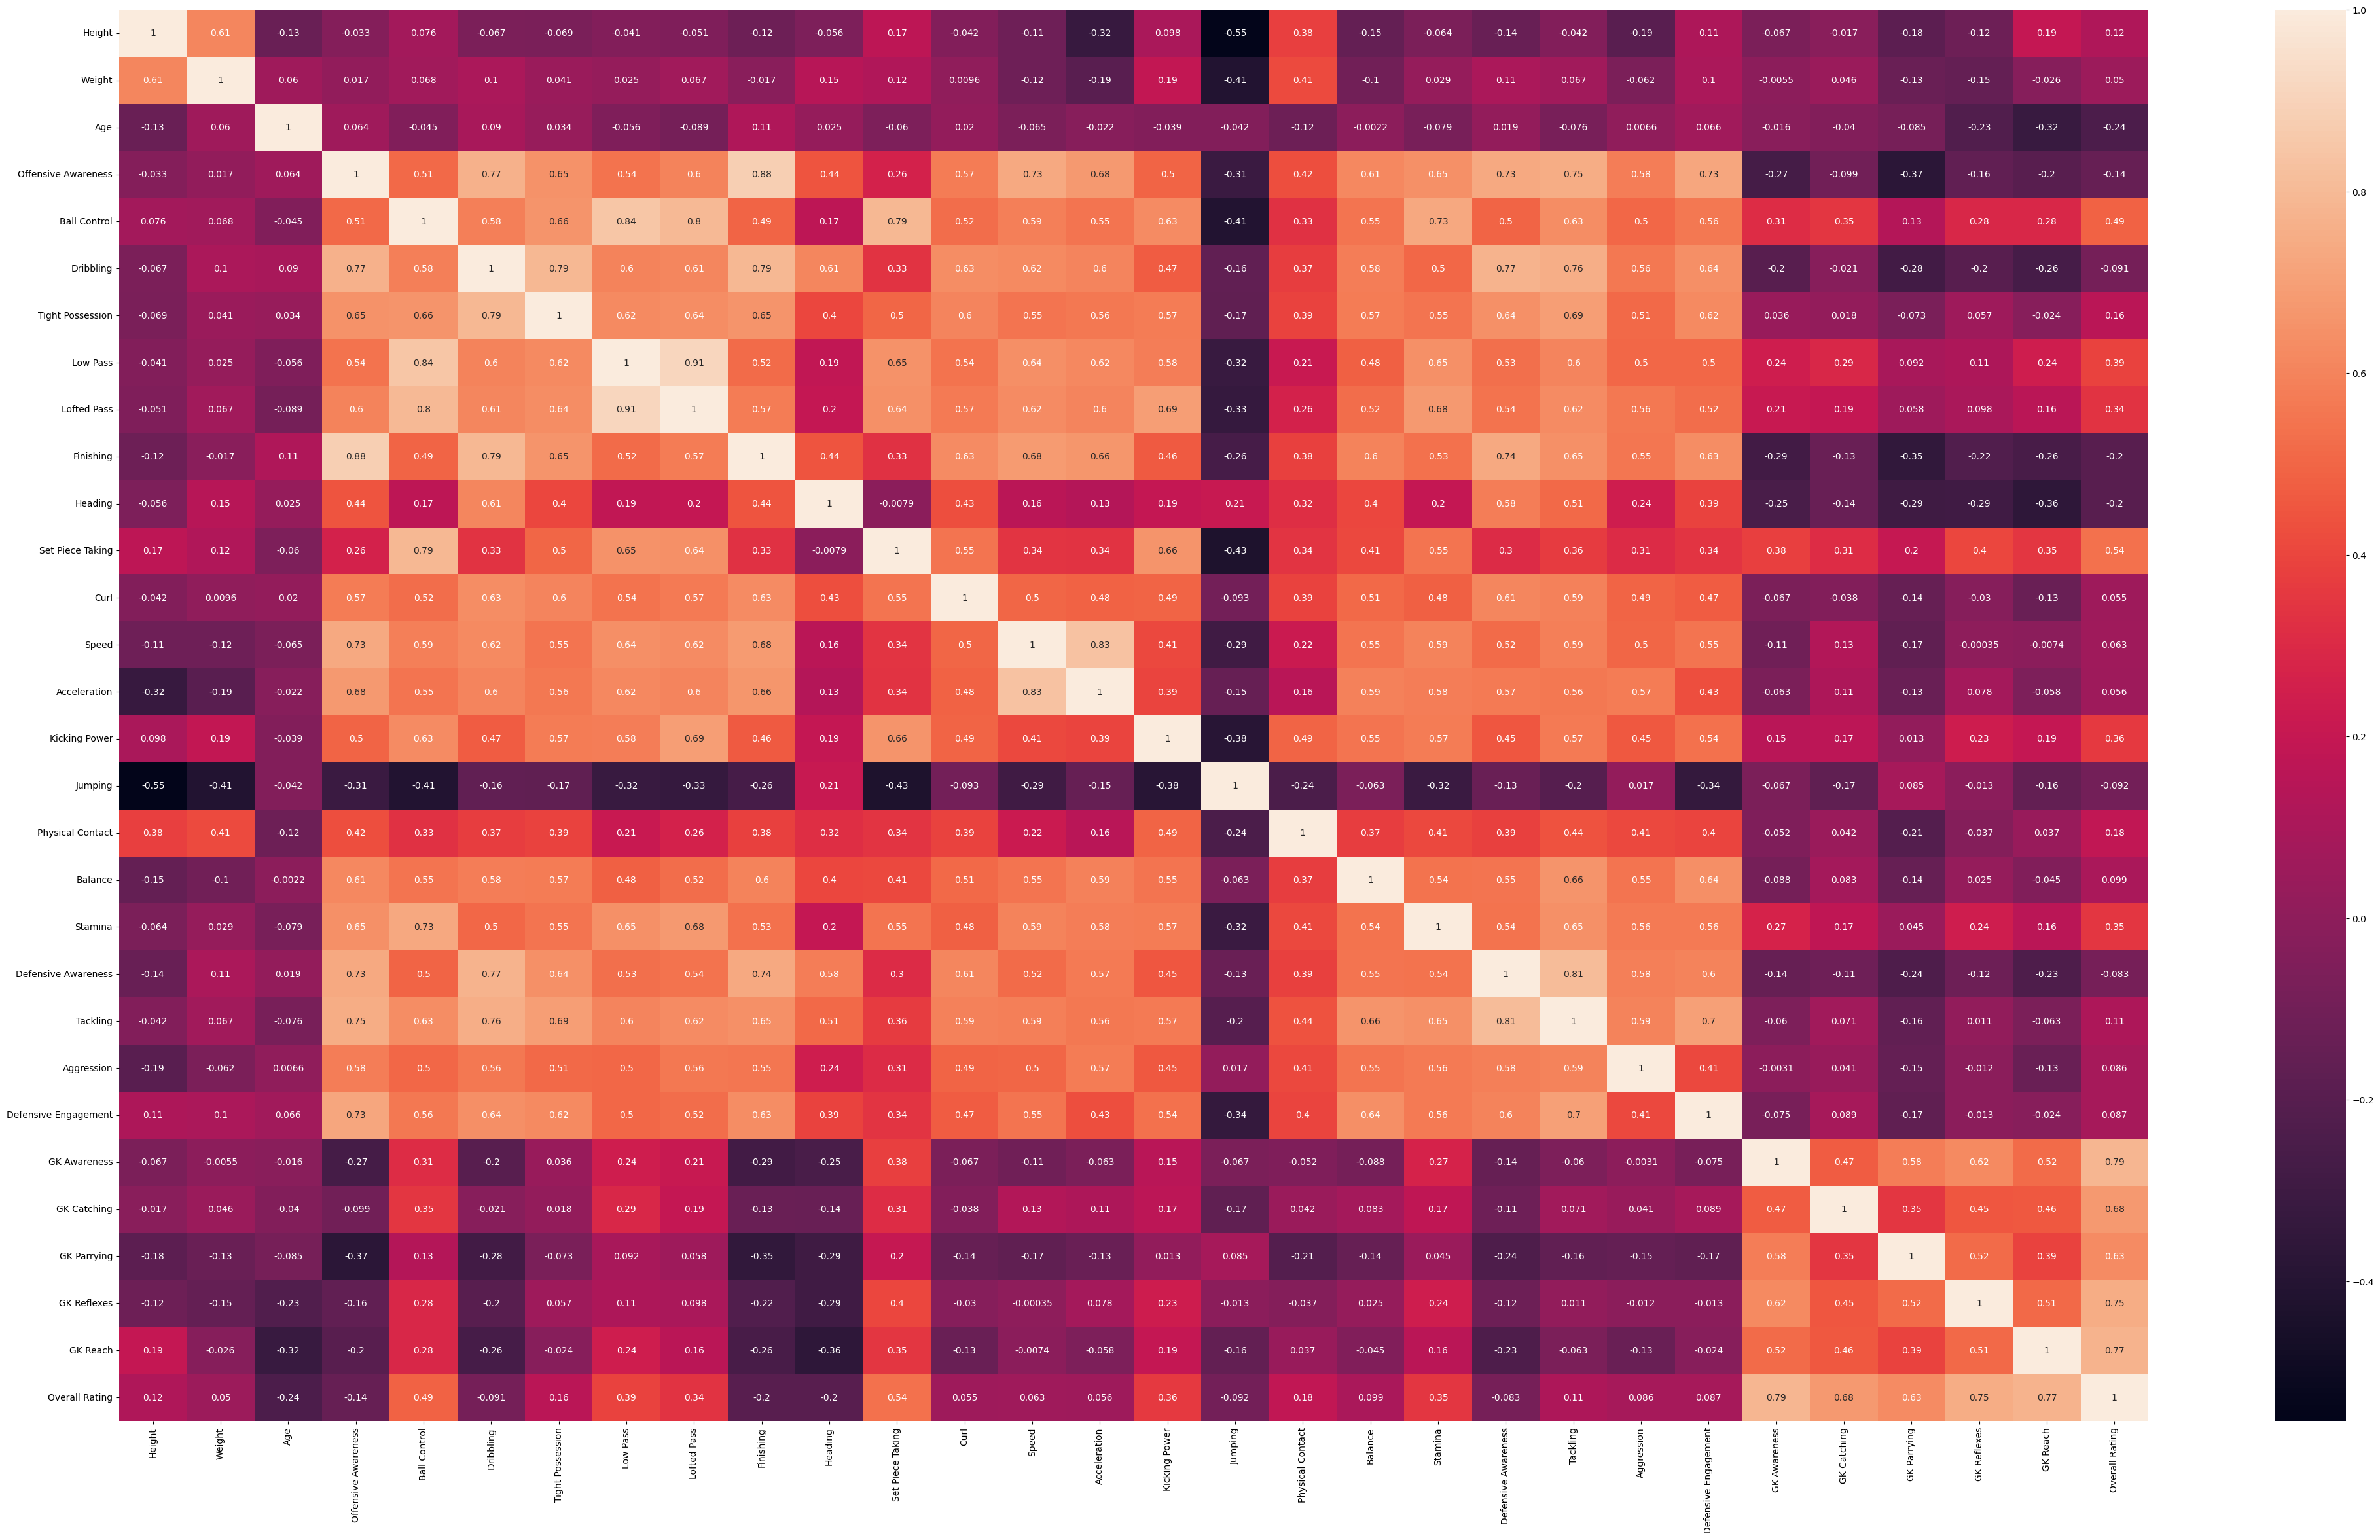

In [5]:
plt.figure(figsize=(50,28))
sns.heatmap(df.corr(), annot = True)

As we can see in the heatmap above overall rating is not correlated significantly with age, weight
and

In [6]:
df = df.drop(['Age','Weight'],axis = 1)

<Axes: xlabel='GK Awareness', ylabel='Overall Rating'>

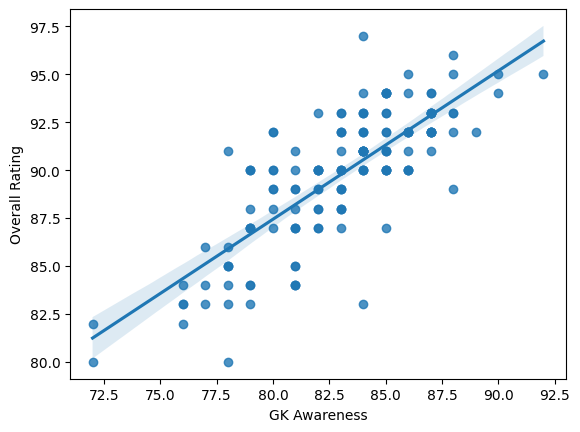

In [7]:
sns.regplot(data = df, x = 'GK Awareness', y = 'Overall Rating')

<Axes: xlabel='GK Reach', ylabel='Overall Rating'>

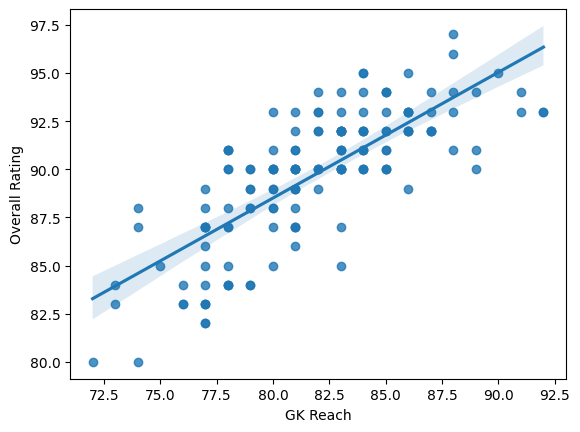

In [8]:
sns.regplot(data = df, x = 'GK Reach', y = 'Overall Rating')

All GK stats are key stats for a goalkeeper



##Scaling And Train Test Split

In [9]:
X = df.drop('Overall Rating', axis =1) # Removing the feature we need to predict
y =df['Overall Rating']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
X_train= scaler.fit_transform(X_train)

In [15]:
X_test = scaler.transform(X_test)

In [16]:
X_train.shape

(138, 27)

In [17]:
X_test.shape

(16, 27)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [19]:
model = Sequential()

model.add(Dense(27,activation='relu'))
model.add(Dense(27,activation='relu'))
model.add(Dense(27,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [20]:
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=4,epochs=200)

Epoch 1/200
35/35 [==============================] - 2s 10ms/step - loss: 7913.2163 - val_loss: 7688.6523
Epoch 2/200
35/35 [==============================] - 0s 4ms/step - loss: 6927.6948 - val_loss: 5969.8804
Epoch 3/200
35/35 [==============================] - 0s 3ms/step - loss: 3813.5825 - val_loss: 1847.7305
Epoch 4/200
35/35 [==============================] - 0s 4ms/step - loss: 583.4066 - val_loss: 313.1200
Epoch 5/200
35/35 [==============================] - 0s 3ms/step - loss: 326.8273 - val_loss: 330.3729
Epoch 6/200
35/35 [==============================] - 0s 3ms/step - loss: 297.1175 - val_loss: 290.7775
Epoch 7/200
35/35 [==============================] - 0s 3ms/step - loss: 269.9863 - val_loss: 347.5161
Epoch 8/200
35/35 [==============================] - 0s 3ms/step - loss: 245.6991 - val_loss: 289.5339
Epoch 9/200
35/35 [==============================] - 0s 3ms/step - loss: 206.9156 - val_loss: 254.3232
Epoch 10/200
35/35 [==============================] - 0s 4ms/step 

In [21]:
model.save('GK_stats_predictor.h5')

## Model Evaluation

In [ ]:
from sklearn.metrics import mean_absolute_error
X_test
predictions = model.predict(X_test)
mean_absolute_error(y_test,predictions)